In [1]:
import pm4py

In [2]:
import pandas as pd
import numpy as np
import pm4py
import os

path_loan = "data/loans.xes"
log = pm4py.read_xes(path_loan)
print(f" Type of the file that is read : {type(log)}")
print(f" Length of the file that is read : {len(log)}")

/Users/i526221/github/pm4py-core/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/100 [00:00<?, ?it/s]

 Type of the file that is read : <class 'pandas.core.frame.DataFrame'>
 Length of the file that is read : 590


In [3]:
log.head()

,time:timestamp,concept:name,lifecycle:transition,case:concept:name
0,2013-04-16 10:08:01.821000+00:00,register application,complete,trace 0
1,2013-04-16 10:16:02.889000+00:00,check credit,complete,trace 0
2,2013-04-16 10:16:27.858000+00:00,calculate capacity,complete,trace 0
3,2013-04-16 10:20:25.117000+00:00,check system,complete,trace 0
4,2013-04-16 10:21:29.939000+00:00,accept,complete,trace 0


In [4]:
start_activities = pm4py.get_start_activities(log)
end_activities = pm4py.get_end_activities(log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'register application': 100}
End activities: {'send decision e-mail': 100}


In [5]:
dfg, start_activities, end_activities = pm4py.discover_dfg_typed(log) 
for item, key in dfg.items():
    print(item, key)


('accept', 'send decision e-mail') 20
('calculate capacity', 'accept') 13
('calculate capacity', 'check credit') 6
('calculate capacity', 'check system') 46
('calculate capacity', 'reject') 35
('check credit', 'accept') 1
('check credit', 'calculate capacity') 54
('check credit', 'check system') 38
('check credit', 'reject') 7
('check system', 'accept') 6
('check system', 'calculate capacity') 42
('check system', 'check credit') 4
('check system', 'reject') 38
('register application', 'calculate capacity') 4
('register application', 'check credit') 90
('register application', 'check system') 6
('reject', 'send decision e-mail') 80


## Visualising the DFG

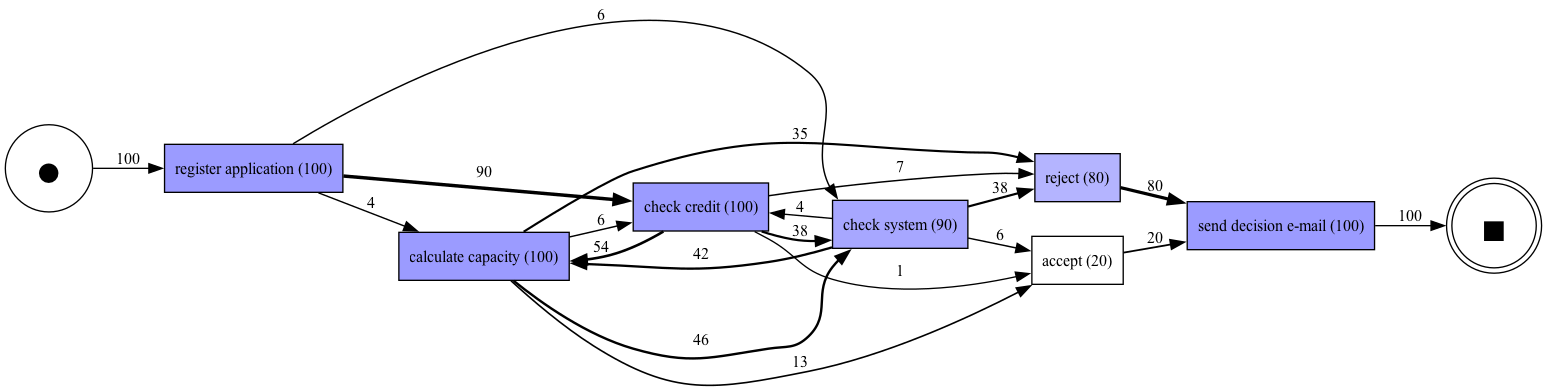

In [6]:
#pm4py.vis.view_dfg(dfg, start_activities, end_activities)  
pm4py.view_dfg(dfg,start_activities, end_activities)

## Visualize the DFG with Timeline

{'register application': Timedelta('0 days 00:00:00.000000028'), 'check credit': Timedelta('0 days 00:06:07.102099988'), 'calculate capacity': Timedelta('0 days 00:12:00.540670003'), 'check system': Timedelta('0 days 00:11:52.301911108'), 'accept': Timedelta('0 days 00:18:54.453750009'), 'send decision e-mail': Timedelta('0 days 00:24:14.436590018'), 'reject': Timedelta('0 days 00:19:20.913925012')}


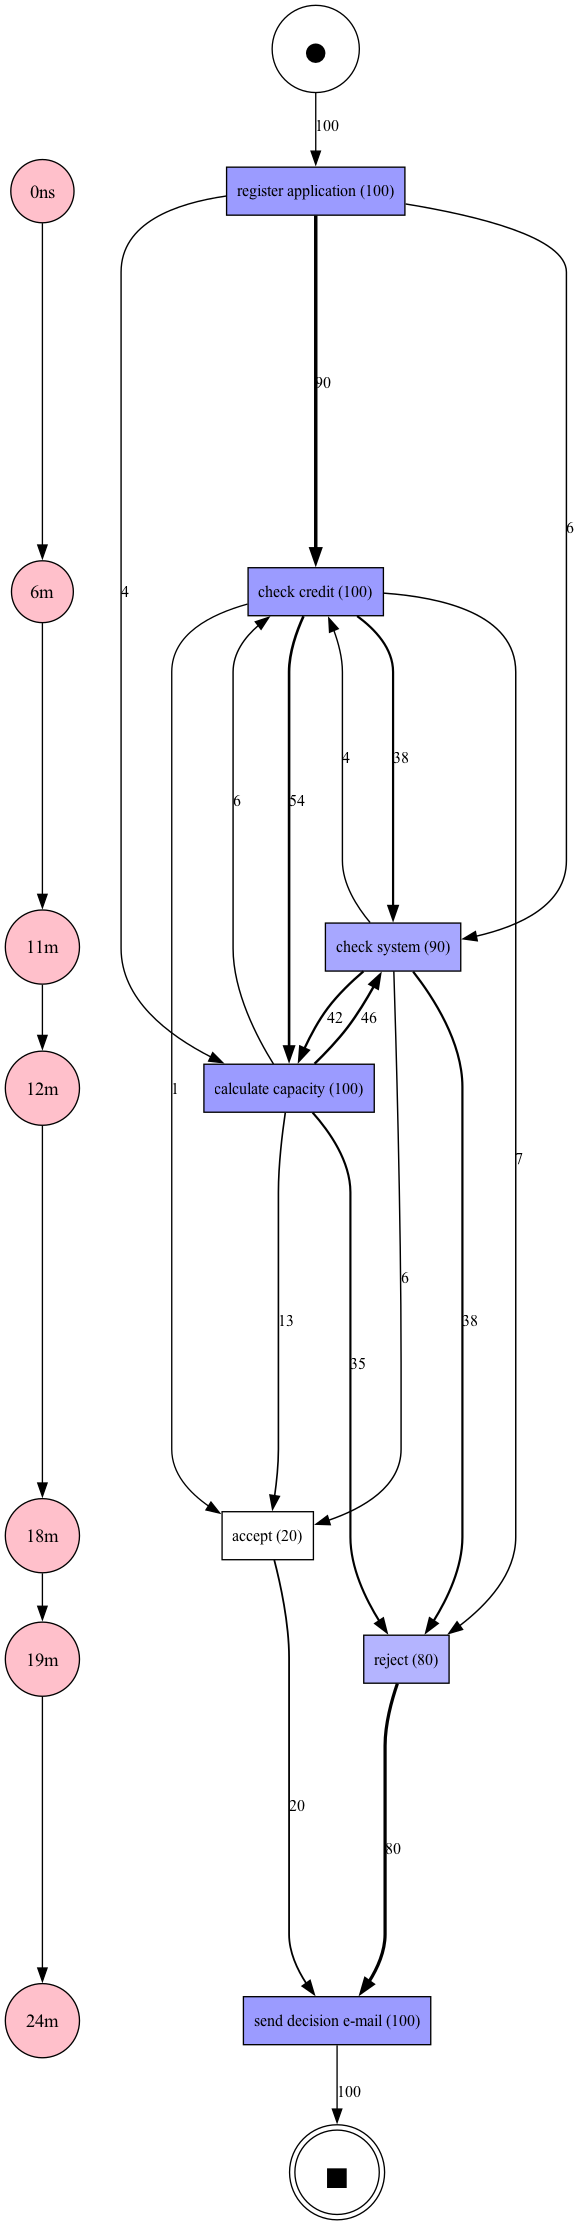

In [7]:
from pm4py.algo.discovery.dfg.variants import clean_time
from pm4py.visualization.dfg.variants import timeline as timeline_gviz_generator
from pm4py.visualization.dfg import visualizer as dfg_visualizer
dfg, start_act, end_act = pm4py.discover_dfg_typed(log)
dfg_time = clean_time.apply(log)
print(dfg_time)
gviz = timeline_gviz_generator.apply(dfg, dfg_time, parameters={"format": "png", "start_activities": start_act,
                                                                    "end_activities": end_act})
dfg_visualizer.view(gviz)
